In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io

pd.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
# READING DATA
content = r"C:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\data_folder\exercise_data.csv"
data = pd.read_csv(content, sep=",| ' ' ")


C:\Users\HP\AppData\Local\Temp\ipykernel_1332\544392051.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(content, sep=",| ' ' ")


In [3]:
# PRINTING THE FIRST 10 ROW OF THE DATA
data.head(10)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1
5,5,1250,39.25,0.43,24.00,0.00,33.00,0.0,bending1
6,6,1500,39.25,0.43,24.00,0.00,33.00,0.0,bending1
7,7,1750,39.00,0.00,23.75,0.43,33.00,0.0,bending1
8,8,2000,39.50,0.50,24.00,0.00,33.00,0.0,bending1
9,9,2250,39.50,0.50,23.00,0.00,33.00,0.0,bending1


In [4]:
# PRINITNG THE LAST 10 ROWS OF THE DATA
data.tail(10)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
41269,41269,117500,28.00,3.24,15.00,0.00,21.67,5.56,walking
41270,41270,117750,34.50,1.50,17.00,1.73,15.00,4.74,walking
41271,41271,118000,36.00,0.00,18.50,4.15,15.00,2.45,walking
41272,41272,118250,36.00,2.45,14.75,4.55,14.67,3.40,walking
41273,41273,118500,37.25,7.26,14.00,1.58,13.25,4.92,walking
41274,41274,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
41275,41275,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
41276,41276,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
41277,41277,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking
41278,41278,119750,32.67,3.09,18.67,0.47,14.00,3.16,walking


In [5]:
data.isnull().sum()


Unnamed: 0      0
time            0
avg_rss12     480
var_rss12     480
avg_rss13     480
var_rss13     480
avg_rss23     480
var_rss23     480
Label           0
dtype: int64

In [6]:
data.shape


(41279, 9)

In [7]:
data_with_space = data[data['avg_rss12'].isna()]


In [8]:
df = data.copy()

df = df.dropna()
df.head(5)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [9]:
df.isna().sum()


Unnamed: 0    0
time          0
avg_rss12     0
var_rss12     0
avg_rss13     0
var_rss13     0
avg_rss23     0
var_rss23     0
Label         0
dtype: int64

In [10]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,41279.0,20639.000000,11916.365218,0.0,10319.50,20639.00,30958.50,41278.00
avg_rss12,40799.0,39.075867,6.333952,0.0,35.25,40.00,44.00,56.25
var_rss12,40799.0,1.446979,2.052088,0.0,0.00,0.50,1.79,17.24
avg_rss13,40799.0,14.292679,5.430023,0.0,11.50,15.00,18.00,35.00
var_rss13,40799.0,1.478507,1.625153,0.0,0.43,0.83,2.28,11.42
avg_rss23,40799.0,15.973015,6.824112,0.0,12.00,15.75,19.25,40.33
var_rss23,40799.0,1.594910,1.620069,0.0,0.47,1.00,2.28,13.61


***Subset all dataset according to their lables***

In [11]:
bending_1_df = df[df['Label'] == 'bending1']
bending_2_df = df[df['Label'] == 'bending2']
cycling_df = df[df['Label'] == 'cycling']
lying_df = df[df['Label'] == 'lying']
sitting_df = df[df['Label'] == 'sitting']
standing_df = df[df['Label'] == 'standing']
walking_df = df[df['Label'] == 'walking']


***Bending_1 Dataframe***

In [12]:
bending_1_df.head()


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [13]:
bending_1_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3360.0,1679.500000,970.092779,0.0,839.75,1679.50,2519.25,3359.00
avg_rss12,3360.0,42.667723,2.361918,33.0,41.75,42.75,44.50,48.00
var_rss12,3360.0,0.454360,0.400185,0.0,0.00,0.47,0.50,3.00
avg_rss13,3360.0,19.158830,4.553348,1.5,16.00,19.50,23.00,30.00
var_rss13,3360.0,0.793399,0.915341,0.0,0.00,0.50,1.12,10.03
avg_rss23,3360.0,30.201982,5.761234,8.0,24.25,31.50,35.50,38.67
var_rss23,3360.0,0.552390,0.543230,0.0,0.00,0.47,0.87,5.26


In [14]:
bending_1_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3360 non-null   int64  
 1   time        3360 non-null   object 
 2   avg_rss12   3360 non-null   float64
 3   var_rss12   3360 non-null   float64
 4   avg_rss13   3360 non-null   float64
 5   var_rss13   3360 non-null   float64
 6   avg_rss23   3360 non-null   float64
 7   var_rss23   3360 non-null   float64
 8   Label       3360 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 262.5+ KB


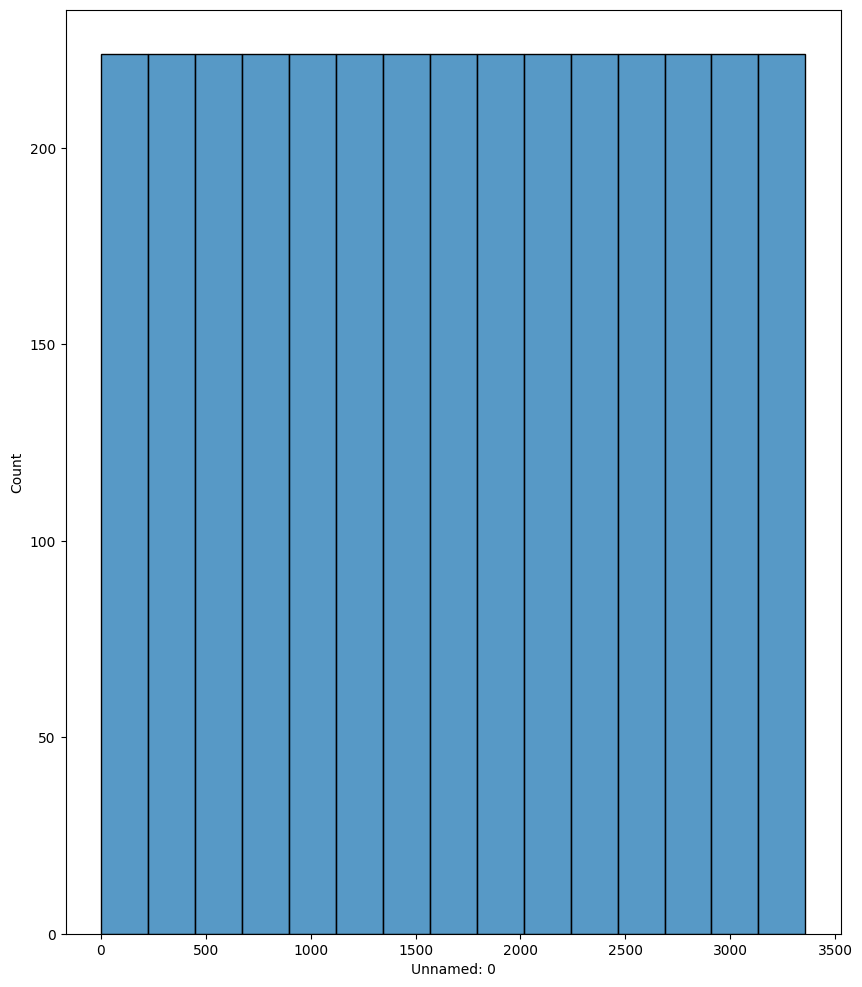

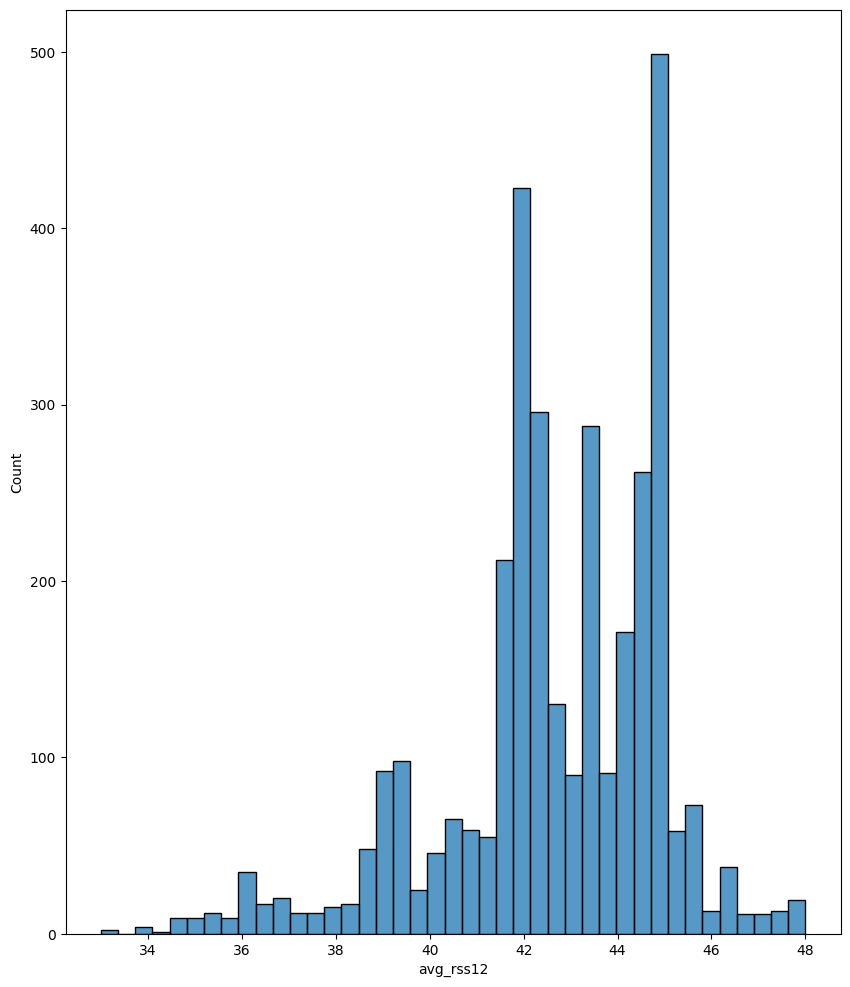

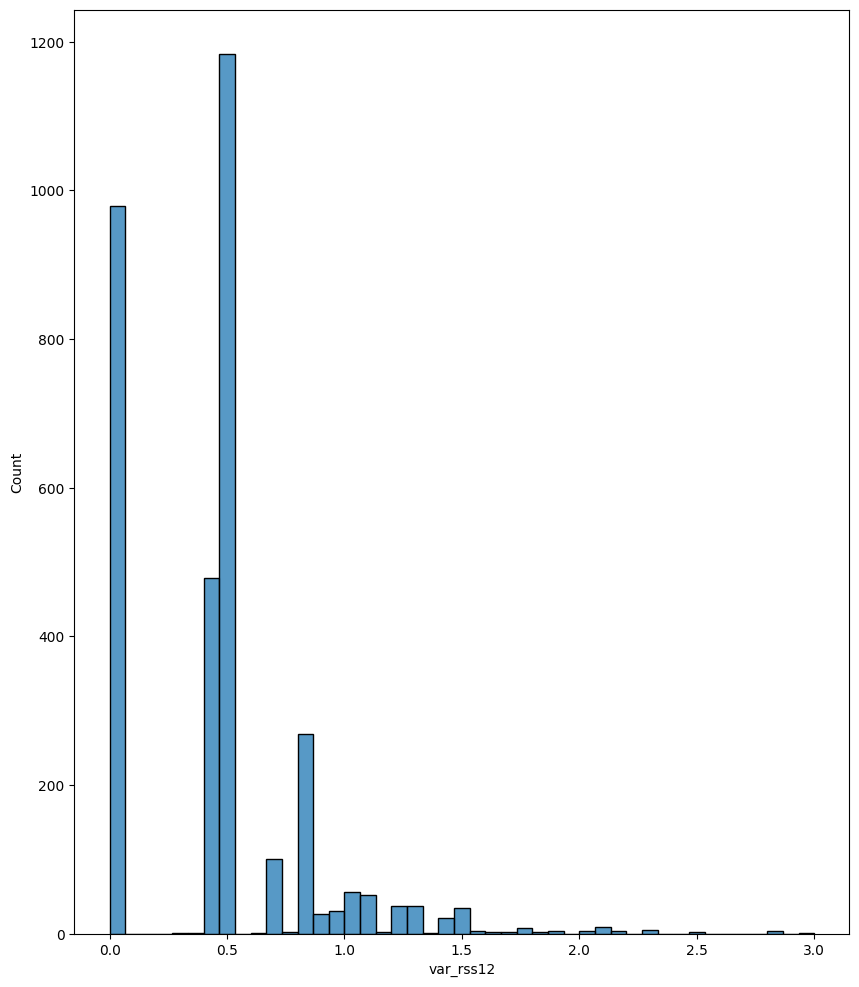

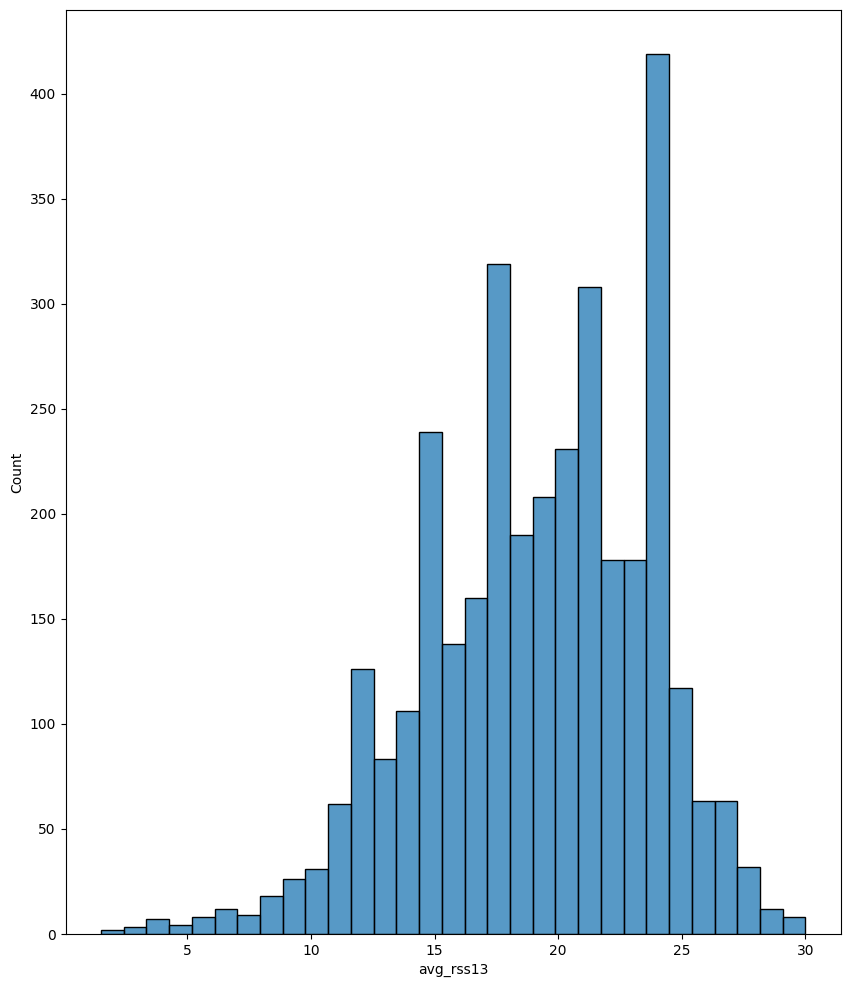

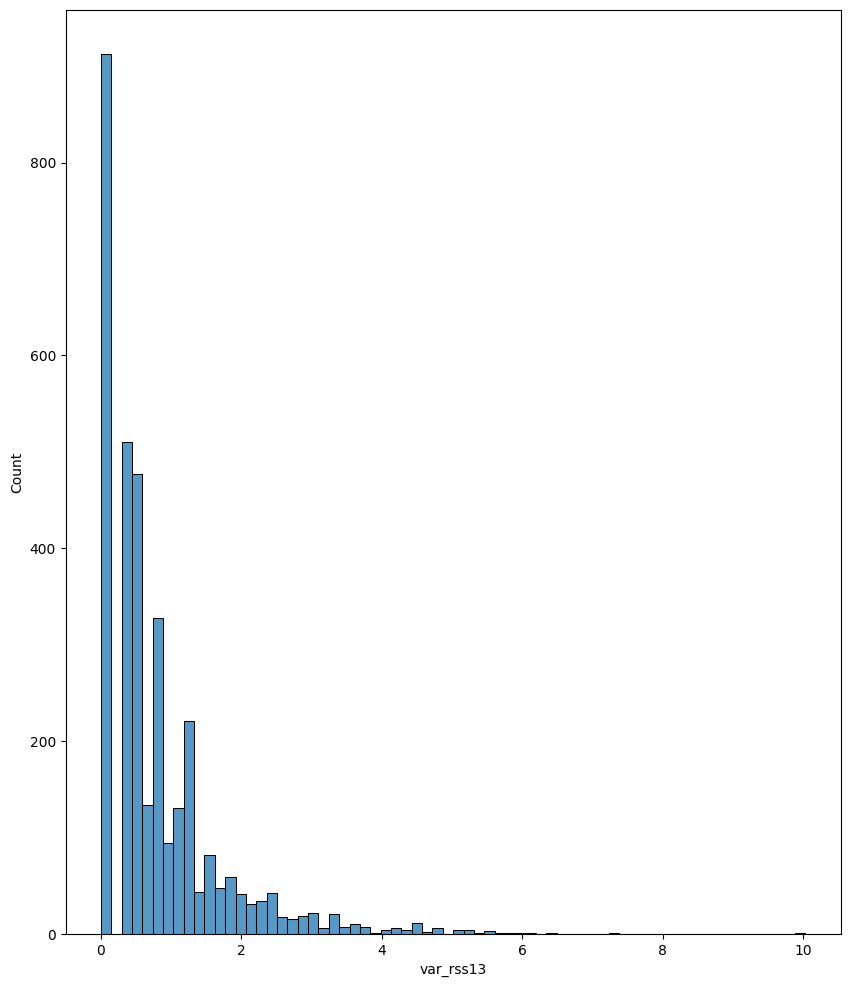

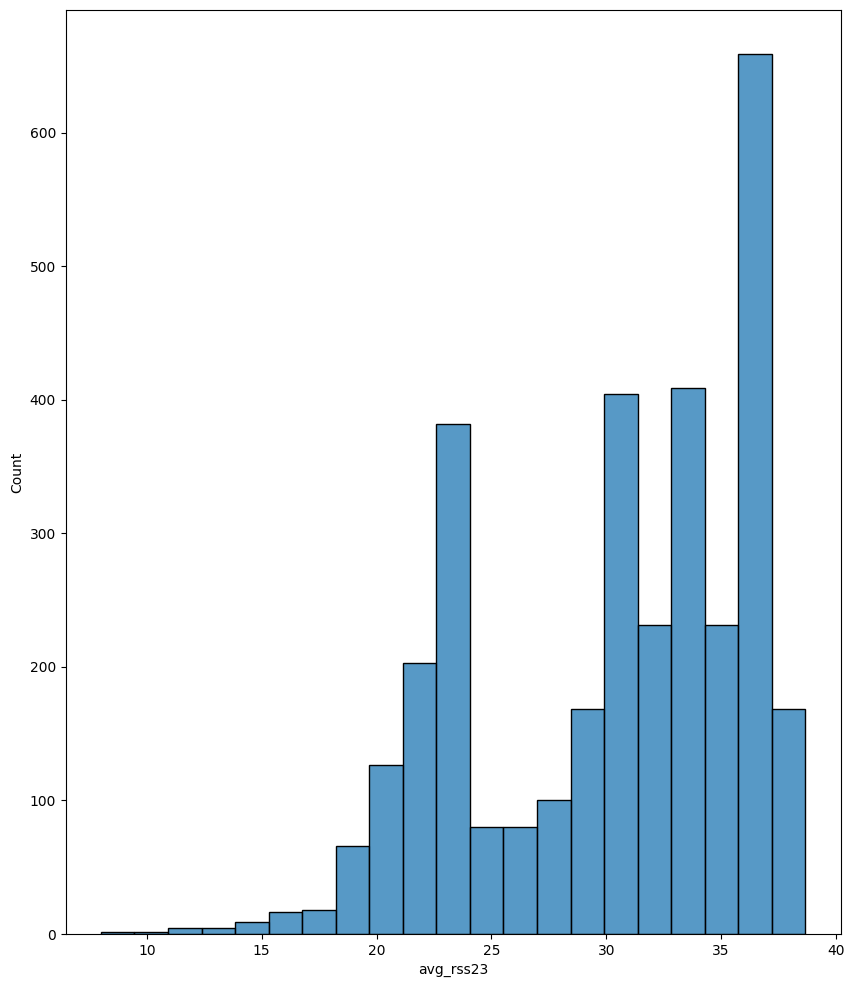

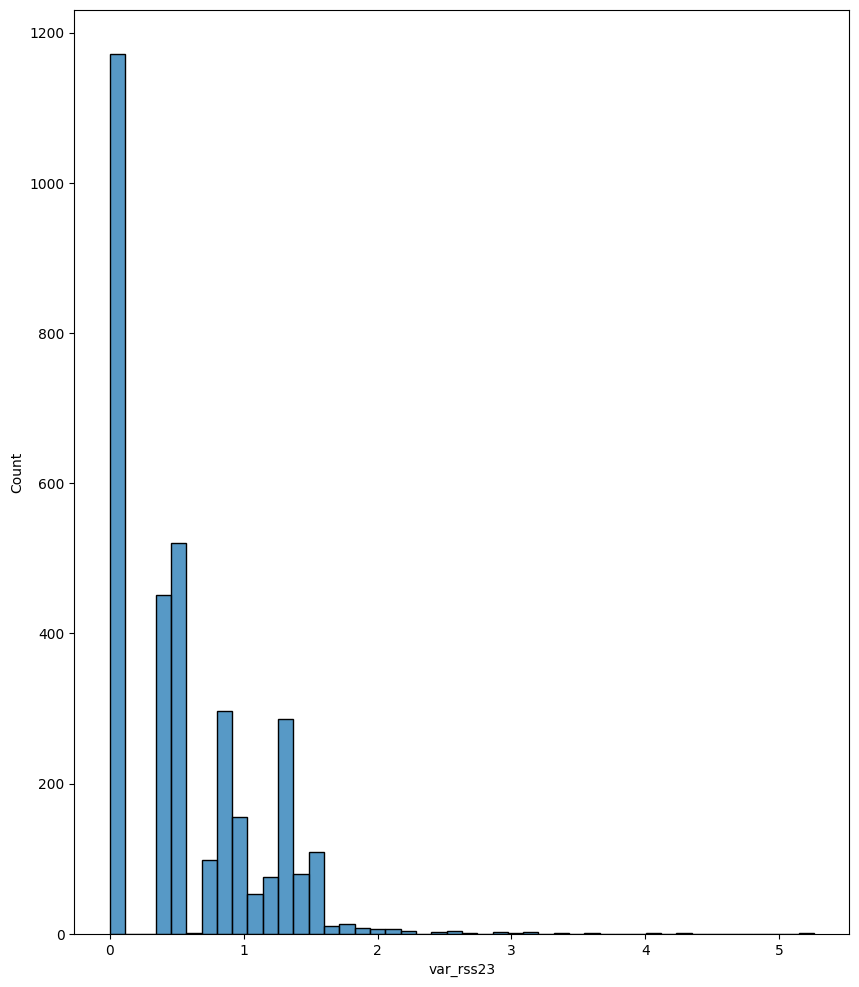

In [15]:
plt.rcParams['figure.figsize'] = (10,12)
for col in bending_1_df.columns:
    if col == "time" or col == "Label":
        pass
    else:
        sns.histplot(data=bending_1_df, x=col)
        plt.show()


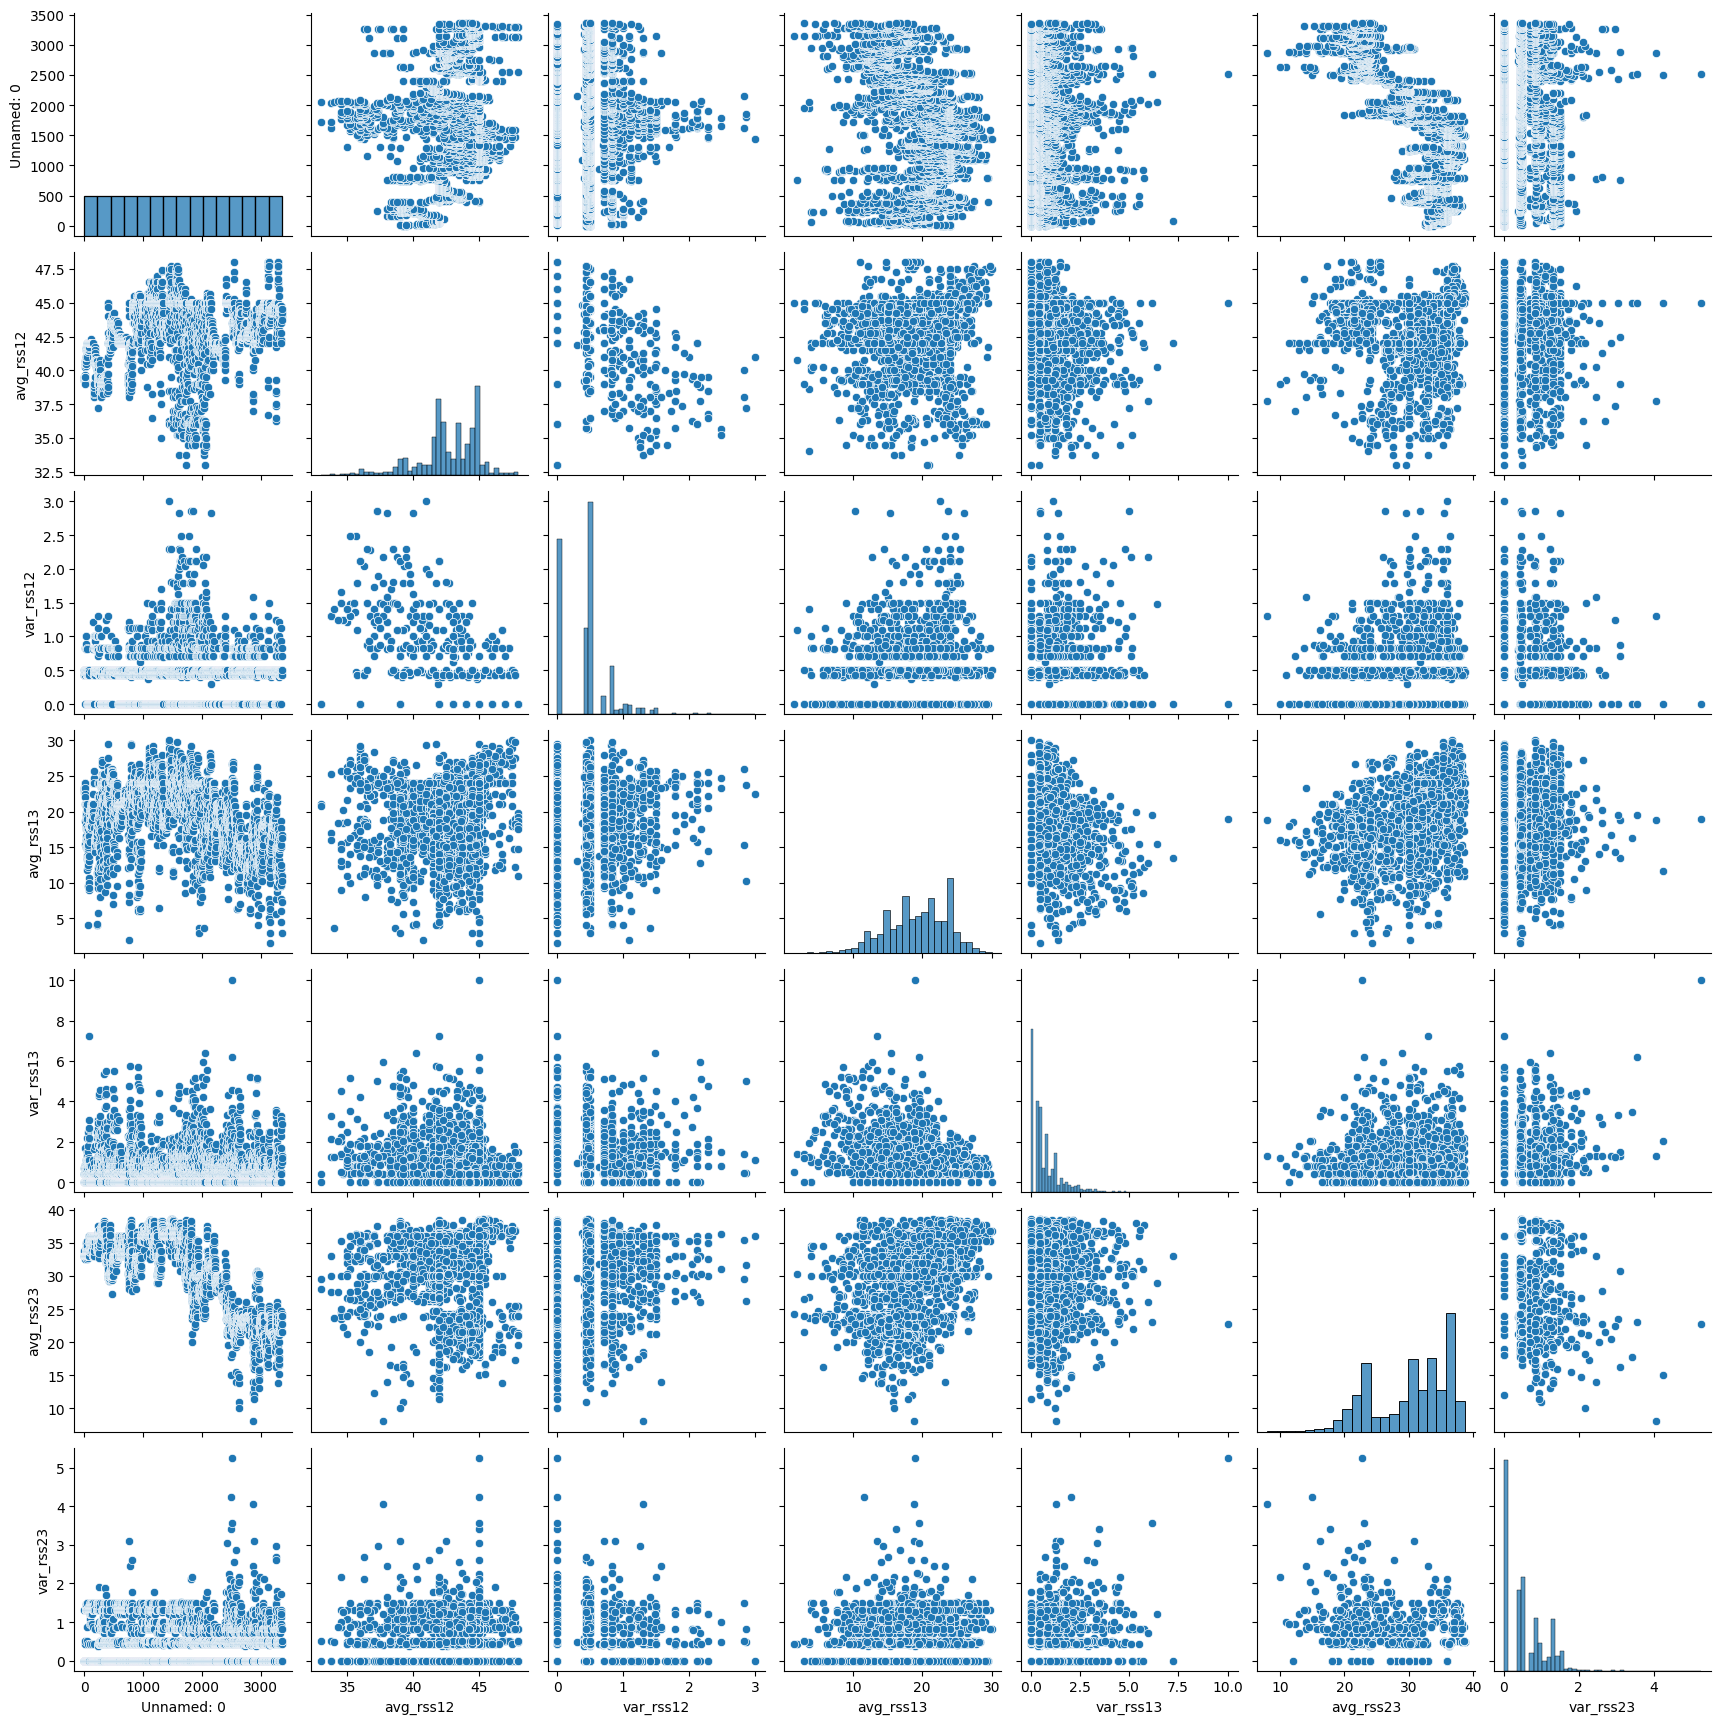

In [16]:
sns.pairplot(data=bending_1_df)
plt.show()


In [17]:
bending_1_df.columns


Index(['Unnamed: 0', 'time', 'avg_rss12', 'var_rss12', 'avg_rss13',
       'var_rss13', 'avg_rss23', 'var_rss23', 'Label'],
      dtype='object')

In [18]:
def outlier(df, threshold):
    outliers = []
    for col in df.columns:
        if col != "Unnamed: 0" and col != "Label" and df[col].dtypes != 'O':
            mean = df[col].mean()
            std = df[col].std()
            z_scores = (df[col] - mean)/std
            col_outliers = df[abs(z_scores) > threshold][col].tolist()
            print(f"The outliers for {col} are {col_outliers}")
            outliers.extend(col_outliers)
    return len(outliers)


In [19]:
outlier(bending_1_df, 3)


The outliers for avg_rss12 are [35.0, 35.25, 35.25, 35.25, 33.75, 35.5, 35.0, 35.25, 33.0, 33.75, 35.0, 34.5, 35.25, 35.25, 35.25, 35.0, 34.5, 35.0, 35.0, 34.67, 34.67, 34.5, 35.25, 35.0, 34.5, 34.5, 35.5, 34.5, 33.75, 34.0, 35.0, 35.25, 33.0, 35.25, 34.33, 34.5, 35.0]
The outliers for var_rss12 are [1.7, 3.0, 2.29, 1.8, 2.29, 1.79, 1.79, 1.73, 1.89, 2.29, 2.0, 2.83, 2.12, 2.28, 2.05, 2.12, 2.12, 1.79, 2.12, 2.49, 2.17, 1.79, 1.79, 2.12, 2.05, 2.12, 1.92, 2.49, 2.12, 1.79, 1.8, 2.86, 1.79, 2.86, 1.92, 2.12, 2.12, 2.29, 2.17, 2.06, 1.79, 2.18, 1.66, 2.83]
The outliers for avg_rss13 are [4.0, 4.0, 4.0, 4.25, 2.0, 3.6, 3.0, 3.67, 4.0, 5.0, 5.0, 1.5, 3.0, 4.5, 4.5, 3.0]
The outliers for var_rss13 are [7.23, 4.27, 4.39, 4.55, 5.34, 4.33, 3.7, 4.64, 4.39, 5.5, 3.77, 4.55, 4.64, 5.5, 4.15, 3.57, 4.76, 3.56, 4.06, 3.67, 5.76, 5.19, 4.85, 5.72, 4.72, 3.91, 4.55, 4.44, 3.7, 4.15, 4.77, 4.44, 4.5, 4.53, 4.02, 5.02, 4.24, 4.02, 3.77, 3.68, 5.15, 4.06, 3.74, 4.72, 3.68, 3.7, 5.21, 4.8, 5.97, 4.21, 

191

In [20]:
outlier(cycling_df, 3)


The outliers for avg_rss12 are [24.25, 23.5, 20.0, 25.0, 18.5, 22.0, 22.0, 21.0, 25.25, 19.0, 22.0, 23.5, 22.25, 24.5, 23.5, 19.25, 23.5, 20.33, 24.25, 22.0, 25.25, 19.0]
The outliers for var_rss12 are [8.58, 10.47, 9.49, 9.12, 10.43, 8.75, 9.25, 8.93, 11.39, 9.5, 9.11, 8.84, 8.79, 8.81, 8.65, 8.98, 9.6, 10.56, 12.6, 9.27, 10.47, 10.47, 9.25, 11.2, 9.55, 10.18, 10.11, 10.11, 9.81, 10.54, 9.11, 9.04, 9.18, 8.58, 8.95, 8.79, 9.91, 12.99, 8.75, 9.04, 11.5, 9.9, 14.17, 10.76, 9.65, 8.6, 12.28, 10.08, 10.53, 10.85, 12.89, 9.12, 12.5, 10.5, 8.58, 9.1, 9.73, 10.84, 10.2, 8.87, 11.12, 8.96, 11.26, 8.76, 8.81, 11.68, 10.87, 10.5, 8.96, 10.5, 8.64]
The outliers for avg_rss13 are [5.5, 5.67, 27.67, 27.0, 5.0, 5.5, 5.5, 27.67, 27.5, 27.5, 27.5, 27.0, 27.0, 28.25, 27.0, 3.0, 27.25, 27.0]
The outliers for var_rss13 are [8.14, 8.41, 10.03, 10.61, 9.63, 9.39, 8.73, 8.23, 8.67, 8.6, 8.1, 9.46, 8.34, 8.96, 8.96, 8.26, 8.73, 8.87, 8.86, 8.17, 8.32, 9.74, 8.23, 8.79, 9.5, 8.65, 8.14, 8.49, 8.34, 9.63, 9.2

220

In [21]:
outlier(lying_df, 3)


The outliers for avg_rss12 are [0.0]
The outliers for var_rss12 are [1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 4.33, 2.17, 1.92, 1.48, 8.49, 1.64, 2.59, 2.49, 1.64, 2.59, 2.49, 1.48, 1.48, 1.48, 1.5, 1.79, 1.58, 1.48, 1.48, 1.79, 2.45, 3.11, 3.08, 1.64, 2.74, 1.92, 2.17, 4.85, 2.55, 1.5, 1.58, 3.68, 3.61, 4.33, 2.17, 1.92, 1.48, 8.49, 1.64, 2.59, 2.49, 1.64, 2.59, 2.49]
The outliers for avg_rss13 are [21.5, 23.0, 22.0, 19.25, 21.5, 19.0, 20.67]
The outliers for var_rss13 are [2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 2.86, 2.62, 2.69, 3.27, 2.62, 3.04, 3.3, 3.27, 3.3, 2.74, 2.69, 5.72, 3.27, 3.84, 2.77, 2.59, 3.99, 3.99, 4.18, 2.69, 3.64, 4.32, 2.62, 2.83, 2.68, 3.5, 2.68, 3.5, 2.68, 3.57, 3.0, 2.87, 3.3, 2.74, 2.59, 3.42, 2.94, 3.3, 5.02, 4.61, 3.24, 3.32, 3.56, 4.32, 2.96, 2.95, 3.49, 2.69, 3.86, 5.91, 4.19, 3.77, 2.74, 2.83, 

341

In [22]:
outlier(standing_df, 3)


The outliers for avg_rss12 are [33.75, 33.33, 35.5, 35.5, 35.5, 35.0, 35.25, 35.5, 35.25, 35.25, 35.25, 35.25, 35.0, 35.4, 35.0, 35.75, 33.75, 33.75, 32.75, 33.0, 34.25, 35.0, 35.25, 35.25, 35.33, 35.0, 30.0, 33.5, 33.75, 33.75, 35.0, 34.5, 35.5, 33.5, 29.75]
The outliers for var_rss12 are [1.79, 3.9, 1.79, 3.27, 1.58, 2.12, 1.79, 1.79, 2.12, 2.12, 1.7, 2.6, 1.79, 1.8, 1.79, 1.58, 1.8, 2.17, 1.64, 2.83, 1.79, 4.5, 2.12, 1.79, 1.79, 1.79, 1.73, 2.18, 2.12, 2.45, 1.79, 3.34, 2.5, 2.77, 1.7, 2.0, 1.7, 2.55, 1.8, 2.95, 1.79, 1.8, 1.79, 1.92, 2.12, 2.12, 1.79, 1.58, 1.79, 2.18, 4.5, 3.35, 1.58, 3.2, 1.8, 3.35, 2.95, 1.89, 2.59, 3.28, 2.12, 4.6, 2.29, 1.66]
The outliers for avg_rss13 are [2.0, 2.67, 2.0, 2.0, 2.5, 2.0, 2.0, 2.5, 2.5, 2.33, 1.5, 1.5, 1.0, 0.0, 1.0, 2.25, 2.0, 2.75, 2.75, 2.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.67, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 2.67, 2.0, 2.67, 0.0, 0.0, 0.0, 1.0, 1.0, 2.5, 1.0, 2.75, 1.0, 2.67, 2.0, 1.5, 2.0, 2.5, 0.0, 0.0, 1.

504

In [23]:
outlier(walking_df, 3)


The outliers for avg_rss12 are [19.33, 19.5, 50.75, 51.25, 19.5, 19.75, 19.5, 20.0, 19.25, 18.67, 12.5, 18.33, 20.0, 15.0, 18.0, 50.25, 49.25, 49.0, 51.0, 18.33, 19.5, 19.33, 18.33, 15.5]
The outliers for var_rss12 are [12.19, 14.5, 13.5, 12.01, 11.79, 13.55, 12.43, 13.47, 11.78, 12.0, 13.48, 14.67, 13.87, 13.47, 11.86, 12.14, 11.76, 12.1, 12.73, 11.9, 12.5, 12.07, 12.47, 12.28, 11.67, 12.47, 14.82, 12.07, 12.26, 13.86, 12.36, 12.97, 12.32, 11.67, 13.05, 12.85, 12.0, 12.53, 12.48, 13.44, 12.5, 13.27, 12.19, 13.48, 15.08, 16.2, 12.03, 12.82, 12.68, 12.08, 12.09, 12.07, 11.72, 12.21, 11.72, 11.97, 12.44, 11.69, 12.48, 12.26, 12.13, 12.38, 12.36, 14.5, 15.37, 12.97, 14.5, 12.14, 12.51, 12.09, 12.68, 17.24]
The outliers for avg_rss13 are [5.5, 6.5, 6.25, 24.25, 6.0, 5.75, 25.25, 5.0, 6.33, 6.5, 24.5, 5.67, 5.0, 6.25, 6.5, 5.5]
The outliers for var_rss13 are [8.73, 8.86, 8.18, 8.26, 8.58, 8.49, 8.19, 9.5, 8.79, 9.0, 9.0, 8.34, 8.22, 8.34, 9.9, 8.64, 8.18, 9.09, 8.18, 9.1, 8.38, 8.15, 9.06, 

209

***FOR THE ORIGINAL DATA***

In [24]:
outlier(df, 3)


The outliers for avg_rss12 are [19.0, 17.5, 15.75, 14.0, 15.0, 15.0, 19.0, 17.25, 18.5, 17.5, 14.0, 19.0, 19.0, 19.75, 13.75, 20.0, 19.0, 12.75, 13.25, 16.75, 17.0, 18.75, 17.25, 17.0, 20.0, 16.0, 18.5, 18.75, 17.5, 19.25, 18.67, 20.0, 18.25, 19.25, 0.0, 17.33, 15.25, 17.67, 18.25, 19.0, 18.75, 20.0, 19.0, 19.33, 19.25, 19.67, 20.0, 20.0, 18.5, 19.0, 19.25, 19.0, 0.0, 19.33, 19.5, 19.5, 19.75, 19.5, 20.0, 19.25, 18.67, 12.5, 18.33, 20.0, 15.0, 18.0, 18.33, 19.5, 19.33, 18.33, 15.5]
The outliers for var_rss12 are [7.76, 9.9, 8.18, 8.58, 7.78, 10.47, 7.85, 9.49, 8.17, 7.7, 9.12, 7.92, 7.85, 8.51, 7.7, 10.43, 8.08, 8.49, 8.75, 9.25, 8.93, 7.79, 11.39, 9.5, 8.01, 9.11, 8.02, 8.84, 7.66, 8.79, 7.82, 8.81, 8.65, 7.82, 8.98, 9.6, 10.56, 12.6, 7.79, 9.27, 7.83, 8.38, 8.17, 8.38, 10.47, 10.47, 7.76, 9.25, 11.2, 7.95, 7.79, 7.71, 9.55, 8.26, 10.18, 10.11, 7.93, 10.11, 9.81, 10.54, 8.5, 8.38, 9.11, 9.04, 9.18, 8.49, 7.63, 8.29, 8.18, 8.58, 8.95, 8.79, 8.16, 9.91, 12.99, 7.85, 8.75, 9.04, 11.5, 9.

2559

In [25]:
df.head(5)


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
0,0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [26]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [27]:
train_df.head()


,Unnamed: 0,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Label
4543,4543,55750,36.00,0.00,23.75,0.43,20.33,0.94,bending2
23233,23233,48250,45.00,0.00,18.50,0.87,21.75,0.83,sitting
3386,3386,6500,23.50,0.50,20.75,0.43,26.50,0.50,bending2
22326,22326,61500,41.75,0.43,3.00,1.41,12.75,0.83,sitting
33982,33982,95750,45.00,0.00,18.00,0.00,11.25,0.83,standing


In [28]:
train_df.drop("Unnamed: 0", axis=1, inplace=True)


***We need to confirm if the label values are distributed***
---
we hereby check with the 'value_counts'

In [29]:
test_df.drop('Unnamed: 0', axis=1, inplace=True)


In [30]:
train_df["Label"].value_counts()


Label
sitting     5820
walking     5754
lying       5750
standing    5720
cycling     5013
bending1    2652
bending2    1930
Name: count, dtype: int64

In [31]:
def duplicates(df):
    before = df.shape[0]
    print(f"Before dropping duplicates, the length was: {before}")
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"After dropping the duplicates found, the length became: {after}")
    removed = before - after
    print(f"Removed duplicated rows is: {removed}")
    return df

train_df = duplicates(train_df)


Before dropping duplicates, the length was: 32639
After dropping the duplicates found, the length became: 30460
Removed duplicated rows is: 2179


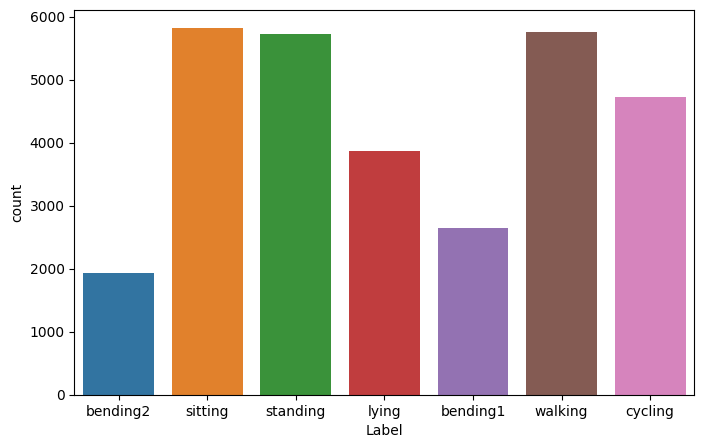

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x="Label", hue=train_df["Label"])
plt.show()


Now We see a case of imbalanced dataset in the train dataframe, we will try to balance the dataframe

In [33]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:, -1]


In [34]:
X_train.head()
y_train


4543     bending2
23233     sitting
3386     bending2
22326     sitting
33982    standing
           ...   
6745      cycling
11764     cycling
38638     walking
860      bending1
16275       lying
Name: Label, Length: 30460, dtype: object

###### For test dataframe also, we will split into X_test, and y_test

In [35]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]


In [36]:
y_test


35394     walking
37653     walking
6725      cycling
36637     walking
22393     sitting
           ...   
29791    standing
7883      cycling
24237     sitting
22954     sitting
32865    standing
Name: Label, Length: 8160, dtype: object

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12, sampling_strategy='not majority', n_jobs=-1)


In [38]:
X_train.columns


Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23'],
      dtype='object')

In [39]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30460 entries, 4543 to 16275
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       30460 non-null  object 
 1   avg_rss12  30460 non-null  float64
 2   var_rss12  30460 non-null  float64
 3   avg_rss13  30460 non-null  float64
 4   var_rss13  30460 non-null  float64
 5   avg_rss23  30460 non-null  float64
 6   var_rss23  30460 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


In [40]:
X_train.astype({"time":"int32"}).dtypes


time           int32
avg_rss12    float64
var_rss12    float64
avg_rss13    float64
var_rss13    float64
avg_rss23    float64
var_rss23    float64
dtype: object

In [41]:
X_test.astype({"time":"int32"}).dtypes


time           int32
avg_rss12    float64
var_rss12    float64
avg_rss13    float64
var_rss13    float64
avg_rss23    float64
var_rss23    float64
dtype: object

***Check the correlation between the X_train dataset***

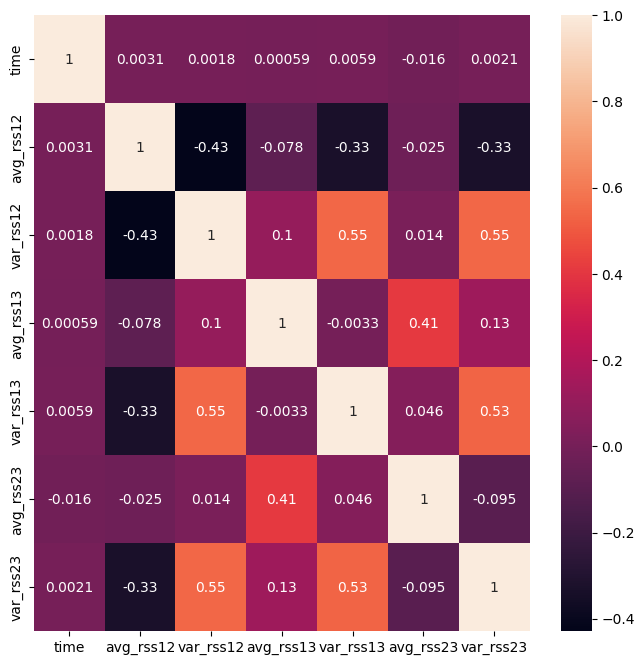

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train.corr(), annot=True, cbar=True)
plt.show()


***We shall try to balance the minority class in our X_train class***

In [43]:
y_train.unique()


array(['bending2', 'sitting', 'standing', 'lying', 'bending1', 'walking',
       'cycling'], dtype=object)

In [44]:
sum(y_train == "bending1")


2652

In [45]:
def balance(X_train, y_train):
    print(f"Class bending_1 has {sum(y_train == 'bending1')} values before over-sampling")
    print(f"Class bending_2 has {sum(y_train == 'bending2')} values before over-sampling")
    print(f"Class sitting has {sum(y_train == 'sitting')} values before over-sampling")
    print(f"Class standing has {sum(y_train == 'standing')} values before over-sampling")
    print(f"Class walking has {sum(y_train == 'walking')} values before over-sampling")
    print(f"Class lying has {sum(y_train == 'lying')} values before over-sampling")
    print(f"Class cycling has {sum(y_train == 'cycling')} values before over-sampling")
    print()
    print("==" * 30)

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

    print()
    print("==" * 30)

    print(f"Class bending_1 has {sum(y_train_res == 'bending1')} values after over-sampling")
    print(f"Class bending_2 has {sum(y_train_res == 'bending2')} values after over-sampling")
    print(f"Class sitting has {sum(y_train_res == 'sitting')} values after over-sampling")
    print(f"Class standing has {sum(y_train_res == 'standing')} values after over-sampling")
    print(f"Class walking has {sum(y_train_res == 'walking')} values after over-sampling")
    print(f"Class lying has {sum(y_train_res == 'lying')} values after over-sampling")
    print(f"Class cycling has {sum(y_train_res == 'cycling')} values after over-sampling")
    return X_train_res, y_train_res


In [46]:
X_train_res , y_train_res = balance(X_train, y_train)


Class bending_1 has 2652 values before over-sampling
Class bending_2 has 1930 values before over-sampling
Class sitting has 5820 values before over-sampling
Class standing has 5720 values before over-sampling
Class walking has 5754 values before over-sampling
Class lying has 3866 values before over-sampling
Class cycling has 4718 values before over-sampling



c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


After OverSampling, the shape of train_X: (40740, 7)
After OverSampling, the shape of train_y: (40740,) 


Class bending_1 has 5820 values after over-sampling
Class bending_2 has 5820 values after over-sampling
Class sitting has 5820 values after over-sampling
Class standing has 5820 values after over-sampling
Class walking has 5820 values after over-sampling
Class lying has 5820 values after over-sampling
Class cycling has 5820 values after over-sampling


***Using VIF Method to check for multicollinearity in independent features***

In [47]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [48]:
X_train_res.describe()


,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,40740.000000,40740.000000,40740.000000,40740.00000,40740.000000,40740.000000
mean,38.510013,1.304288,14.920461,1.39297,17.324485,1.491127
std,6.579176,1.913392,5.398496,1.54645,7.502743,1.539080
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,34.297725,0.200530,12.000000,0.43000,12.750000,0.470000
50%,39.750000,0.500000,15.500000,0.82000,16.670000,0.922299
75%,43.500000,1.410000,18.634518,2.05000,20.750000,2.050000
max,56.250000,17.240000,35.000000,11.42000,40.330000,10.210000


In [49]:
X_train_res.head()


,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,55750.0,36.00,0.00,23.75,0.43,20.33,0.94
1,48250.0,45.00,0.00,18.50,0.87,21.75,0.83
2,6500.0,23.50,0.50,20.75,0.43,26.50,0.50
3,61500.0,41.75,0.43,3.00,1.41,12.75,0.83
4,95750.0,45.00,0.00,18.00,0.00,11.25,0.83


***Using some hyperparameter tuning***
> But before tuning parameters, we remember we didn't cast the labels to numerical values, we will do that first, and then do some 
> grid search hyperparameter tuning

In [50]:
y_train_res.map({"bending1":0, "bending2":1, "sitting":2, "standing":3, "lying":4, "walking":5, "cycling":6}).astype("int32")
y_test.map({"bending1":0, "bending2":1, "sitting":2, "standing":3, "lying":4, "walking":5, "cycling":6}).astype("int32")


35394    5
37653    5
6725     6
36637    5
22393    2
        ..
29791    3
7883     6
24237    2
22954    2
32865    3
Name: Label, Length: 8160, dtype: int32

In [51]:
print(y_train_res.nunique())
print(y_test.nunique())


7
7


In [52]:
numerical_col = X_train_res.columns


In [53]:
#importing dependencies

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [54]:
numerical_pipeline = Pipeline(
    steps= [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
        ]
)


In [55]:
preprocessor = ColumnTransformer(
    [
        ("numerical_pipeline", numerical_pipeline, numerical_col)
    ]
)


In [56]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train_res), columns = preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())


In [57]:
X_test.shape


(8160, 7)

In [58]:
y_test.shape


(8160,)

---
>Now that we have applied pipeline and columntransformer on the dataset, we can now apply hyperparameter tuning and fit the model
---

In [59]:
param_grid = {
    "loss" : ["hinge", "log_loss", "modified_huber"],
    "penalty" : ["l2", "l1", "elasticnet"],
    "alpha" : [1e-4, 0.003, 0.8, 1, 10, 100],
    "n_jobs" : [1,2,3],
    "learning_rate" : ["constant", "optimal", "adaptive"],
    'eta0' : [0.01, 0.02]
}


In [76]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()


In [77]:
grid_search = GridSearchCV(sgd_model, param_grid, cv=5, n_jobs=-1, verbose=3)


In [78]:
grid_search.fit(X_train, y_train_res)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.003, 0.8, 1, 10, 100],
                         'eta0': [0.01, 0.02],
                         'learning_rate': ['constant', 'optimal', 'adaptive'],
                         'loss': ['hinge', 'log_loss', 'modified_huber'],
                         'n_jobs': [1, 2, 3],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=3)

In [79]:
grid_search.best_estimator_


SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', n_jobs=2,
              penalty='l1')

---
> We shall write a custom function to train the model, we might want to use different algorithms
---

In [88]:
final_model = list()
def model_train(model, X_train=X_train, X_test=X_test, y_train=y_train_res, y_test=y_test, name=""):
    try:
        """
        The function takes some parameters:
        model: The estimator you want to fit on the data
        X_train: The train dataset
        X_test: The test dataset
        y_train: The train label dataset, ranging from 0-6, representing bending1, bending2, sitting, standing, lying, walking, cycling
        y_test: The test label dataset, ranging from 0-6, representing bending1, bending2, sitting, standing, lying, walking, cycling
        name: The name of the model algorithm used

        Returns: 
        Accuracy Score
        Confusion Matrix
        Classification Report
        Precision Score
        """
        
        model.fit(X_train, y_train) #<--- We fit the model right here
        train_pred = model.predict(X_train) #<--- We predict on the train dataset first
        test_pred = model.predict(X_test)  #<--- We predict on the test dataset lastly, for comparison sake
        
        # Getting the accuracy of the model predictions
        train_accuracy = accuracy_score(y_train, train_pred) *100
        test_accuracy = accuracy_score(y_test, test_pred) *100

        # Getting the classification report of the model
        train_classification = classification_report(y_train, train_pred)
        test_classification = classification_report(y_test, test_pred)
        classification_report_list = [train_classification, test_classification]

        for names in classification_report_list:
            print(f"Classifiaction report for\n {names}")
            print("_____" * 30)


        # plotting the confusion matrix of the model prediction
        cfm = confusion_matrix(y_test, test_pred)
        plt.figure(figsize=(7,5))
        sns.heatmap(cfm, annot=True)
        plt.xlabel("Actual Label")
        plt.ylabel("Predicted Label")
        plt.show()
        
        #Precision Score for both train and test set

        train_precision = precision_score(y_train, train_pred, average="weighted") * 100
        test_precision = precision_score(y_test, test_pred, average="weighted") * 100


        
 
        return final_model.append(
            {
                "Model" : name, \
                "Train_Accuracy" : train_accuracy,\
                "Test Accuracy" : test_accuracy,\
                "Train Precision" : train_precision,\
                "Test Precision" : test_precision
            }
        )
    except Exception as e:
        return f"{e}"


Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.82      0.95      0.88      5820
    bending2       0.77      0.85      0.80      5820
     cycling       0.63      0.47      0.54      5820
       lying       0.74      0.88      0.80      5820
     sitting       0.46      0.30      0.36      5820
    standing       0.59      0.56      0.57      5820
     walking       0.63      0.75      0.69      5820

    accuracy                           0.68     40740
   macro avg       0.66      0.68      0.66     40740
weighted avg       0.66      0.68      0.66     40740

______________________________________________________________________________________________________________________________________________________
Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.72      0.92      0.81       708
    bending2       0.46      0.83      0.59       470
     cycling       0.61      0.46  

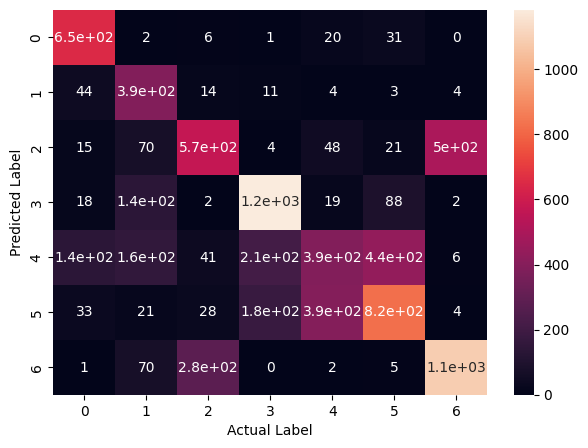

CPU times: total: 3.2 s
Wall time: 3.36 s


In [89]:
%%time

sgd_model = SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', n_jobs=2, penalty='l1')
model_train(sgd_model, name="SGDCLASSIFIER")


In [90]:
type(final_model)


list

In [91]:
pd.DataFrame(final_model)



,Model,Train_Accuracy,Test Accuracy,Train Precision,Test Precision
0,SGDCLASSIFIER,68.006873,62.389706,66.202815,61.403969


---
> Using Random Forest to train the model

---

In [96]:
param_grid_rf = {
    "splitter" : ['best', 'random'],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [2,3,4],
    "min_samples_split" : [10, 20, 30],
    "min_samples_leaf" : [5, 7, 9]
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [97]:
random_forest = RandomForestClassifier()
grid_search_rf = GridSearchCV(random_forest, cv=5, param_grid=param_grid_rf, n_jobs=-1, verbose=1)


In [98]:
grid_search_rf.fit(X_train, y_train_res)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [99]:
grid_search_rf.best_estimator_


RandomForestClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=10,
                       n_estimators=300)

Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.87      0.91      0.89      5820
    bending2       0.86      0.84      0.85      5820
     cycling       0.63      0.57      0.60      5820
       lying       0.66      0.91      0.77      5820
     sitting       0.46      0.06      0.11      5820
    standing       0.51      0.74      0.60      5820
     walking       0.67      0.76      0.71      5820

    accuracy                           0.68     40740
   macro avg       0.67      0.68      0.65     40740
weighted avg       0.67      0.68      0.65     40740

______________________________________________________________________________________________________________________________________________________
Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.83      0.86      0.84       708
    bending2       0.64      0.82      0.72       470
     cycling       0.60      0.54  

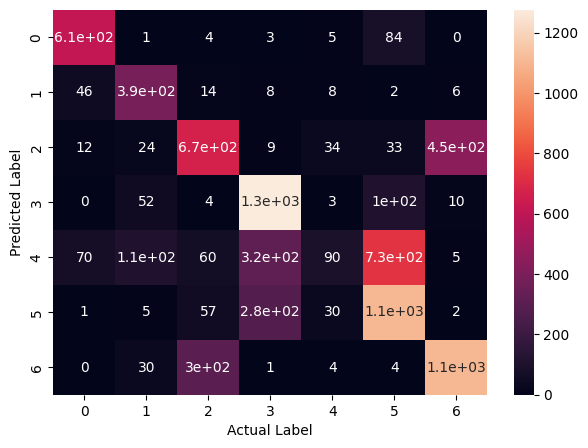

In [100]:
rf = RandomForestClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=10, n_estimators=300)

model_train(rf, name="Random Forest")


In [101]:
final_model


[{'Model': 'SGDCLASSIFIER',
  'Train_Accuracy': 68.00687285223368,
  'Test Accuracy': 62.38970588235294,
  'Train Precision': 66.20281525782215,
  'Test Precision': 61.4039689747001},
 {'Model': 'Random Forest',
  'Train_Accuracy': 68.30633284241532,
  'Test Accuracy': 64.2279411764706,
  'Train Precision': 66.69463686869108,
  'Test Precision': 62.758239158283516}]

In [102]:
fm = pd.DataFrame(final_model)


In [103]:
fm


,Model,Train_Accuracy,Test Accuracy,Train Precision,Test Precision
0,SGDCLASSIFIER,68.006873,62.389706,66.202815,61.403969
1,Random Forest,68.306333,64.227941,66.694637,62.758239


In [105]:
param_grid_ds = {
    "splitter" : ['best', 'random'],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [2,3,4],
    "min_samples_split" : [10, 20, 30],
    "min_samples_leaf" : [5, 7, 9]
}

from sklearn.tree import DecisionTreeClassifier


In [107]:
dc_model = DecisionTreeClassifier()

grid_search_dc = GridSearchCV(dc_model, param_grid=param_grid_ds, cv=5, n_jobs=-1, verbose=2)


In [108]:
grid_search_dc.fit(X_train, y_train_res)



Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [10, 20, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [109]:
grid_search_dc.best_estimator_


DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10)

c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.87      0.91      0.89      5820
    bending2       0.86      0.74      0.80      5820
     cycling       0.60      0.47      0.53      5820
       lying       0.58      0.90      0.71      5820
     sitting       0.00      0.00      0.00      5820
    standing       0.44      0.71      0.54      5820
     walking       0.65      0.74      0.69      5820

    accuracy                           0.64     40740
   macro avg       0.57      0.64      0.59     40740
weighted avg       0.57      0.64      0.59     40740

______________________________________________________________________________________________________________________________________________________
Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.82      0.87      0.84       708
    bending2       0.64      0.72      0.68       470
     cycling       0.57      0.45  

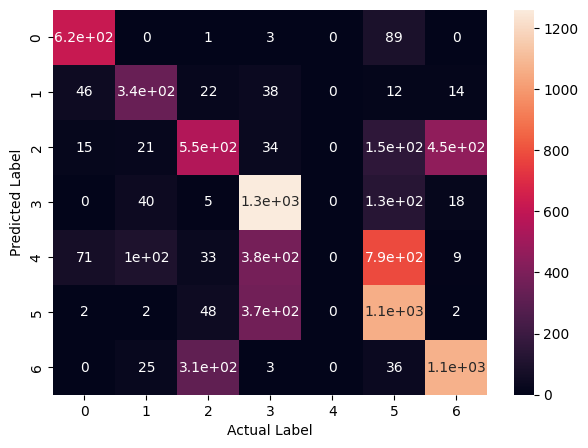

c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Desktop\Project-Folder\data_fusion_and_prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
decision_tree_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10)

model_train(decision_tree_model, name="Decision Tree Model")



In [111]:
final_model


[{'Model': 'SGDCLASSIFIER',
  'Train_Accuracy': 68.00687285223368,
  'Test Accuracy': 62.38970588235294,
  'Train Precision': 66.20281525782215,
  'Test Precision': 61.4039689747001},
 {'Model': 'Random Forest',
  'Train_Accuracy': 68.30633284241532,
  'Test Accuracy': 64.2279411764706,
  'Train Precision': 66.69463686869108,
  'Test Precision': 62.758239158283516},
 {'Model': 'Decision Tree Model',
  'Train_Accuracy': 63.932253313696606,
  'Test Accuracy': 59.95098039215686,
  'Train Precision': 57.1364026474111,
  'Test Precision': 50.673263915330025}]

In [114]:
from catboost import CatBoostClassifier


Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.96      0.97      0.96      5820
    bending2       0.96      0.96      0.96      5820
     cycling       0.83      0.85      0.84      5820
       lying       0.97      0.98      0.98      5820
     sitting       0.84      0.80      0.82      5820
    standing       0.85      0.86      0.86      5820
     walking       0.86      0.85      0.86      5820

    accuracy                           0.90     40740
   macro avg       0.90      0.90      0.90     40740
weighted avg       0.90      0.90      0.90     40740

______________________________________________________________________________________________________________________________________________________
Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.90      0.91      0.91       708
    bending2       0.84      0.89      0.86       470
     cycling       0.66      0.68  

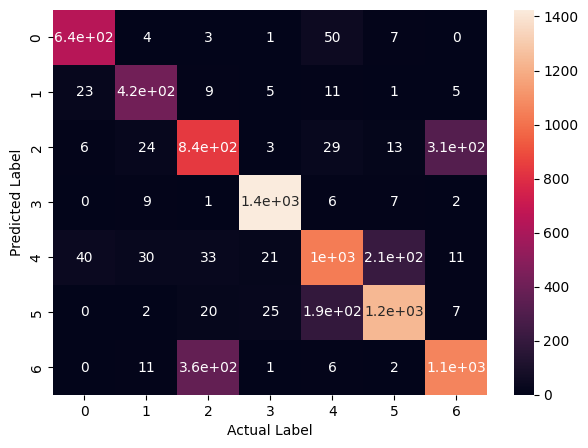

In [115]:
cat_model = CatBoostClassifier(random_state=42, verbose=False)

model_train(cat_model, name="CatBoost Model")


In [112]:
from sklearn.ensemble import VotingClassifier


In [116]:
soft_votes = VotingClassifier(
    estimators=[
        ("sgd_class", sgd_model),
        ("random_forest", rf),
        ("decision_tree model", decision_tree_model),
        ("Cat Boost", cat_model)
                ],
                voting='soft'
    )


Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.89      0.95      0.91      5820
    bending2       0.88      0.88      0.88      5820
     cycling       0.73      0.71      0.72      5820
       lying       0.81      0.95      0.88      5820
     sitting       0.81      0.57      0.67      5820
    standing       0.78      0.81      0.79      5820
     walking       0.74      0.77      0.76      5820

    accuracy                           0.81     40740
   macro avg       0.81      0.81      0.80     40740
weighted avg       0.81      0.81      0.80     40740

______________________________________________________________________________________________________________________________________________________
Classifiaction report for
               precision    recall  f1-score   support

    bending1       0.84      0.89      0.87       708
    bending2       0.65      0.85      0.74       470
     cycling       0.63      0.62  

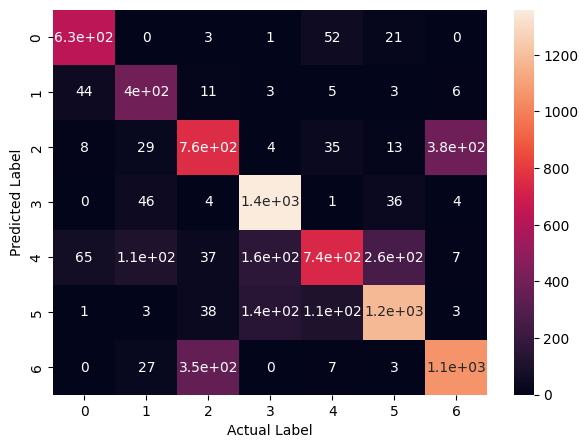

CPU times: total: 2min 26s
Wall time: 1min 13s


In [117]:
%%time
model_train(soft_votes, name="Soft Votes Classifier")


In [119]:
hard_votes = VotingClassifier(
    estimators=[
        ("sgd_class", sgd_model),
        ("random_forest", rf),
        ("decision_tree model", decision_tree_model),
        ("Cat Boost", cat_model)
                ],
                voting='hard'
    )


In [122]:
%%time
model_train(hard_votes, name="Hard Votes")


CPU times: total: 2min 18s
Wall time: 1min 10s


'setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 40740) + inhomogeneous part.'

In [123]:
final_df = pd.DataFrame(final_model)


In [124]:
final_df


,Model,Train_Accuracy,Test Accuracy,Train Precision,Test Precision
0,SGDCLASSIFIER,68.006873,62.389706,66.202815,61.403969
1,Random Forest,68.306333,64.227941,66.694637,62.758239
2,Decision Tree Model,63.932253,59.950980,57.136403,50.673264
3,CatBoost Model,89.739813,81.482843,89.700276,81.435232
4,Soft Votes Classifier,80.581738,75.061275,80.528316,75.132987


*** Observation***
---
>
---